In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

def pinta(res,resLabel,tipoExp,label,vmin=0,vmax=None):
    for g,l in zip(res,resLabel):
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 9)
        ax= sns.barplot(x=g[tipoExp], y=g['mae'], data=g, ci="sd", capsize=.2,palette="coolwarm",ax=ax)
        ax.set(xlabel=label, ylabel = "MAE medio y desviación estándar")
        if not vmax is None:
            ax.set(ylim=(vmin, vmax))
        ax.set_title(l)
        plt.savefig(l+".png")


def pintaLin(res,resLabel,tipoExp,label,grape,cigrape,mejor,res2=None,tipoExp2=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    ax= sns.lineplot(x=res[tipoExp], y=res['mae'], data=res, ci="sd",palette="coolwarm",ax=ax,label="grape 1xbatch")
    ax= sns.lineplot(x=res[tipoExp], y=grape, data=res,palette="coolwarm",ax=ax, label="grape")
    ax= sns.lineplot(x=res[tipoExp], y=grape-0.5*cigrape, data=res,palette="coolwarm",ax=ax, alpha=0.1)
    ax= sns.lineplot(x=res[tipoExp], y=grape+0.5*cigrape, data=res,palette="coolwarm",ax=ax, alpha=0.1)
    ax.fill_between(res[tipoExp], grape-0.5*cigrape, grape+0.5*cigrape,color='tab:brown',alpha=0.2)
    if not res2 is None:
        ax= sns.lineplot(x=res2[tipoExp], y=res2['mae'], data=res2, ci=None,palette="coolwarm",marker='o', ax=ax,label="grape batch total")


    ax= sns.lineplot(x=res[tipoExp], y=mejor, data=res, ci="sd",palette="coolwarm",ax=ax, label="Mejor baseline")
    ax.set(xlabel=label, ylabel = "MAE medio y desviación estándar")
    ax.set_title(resLabel)

def pintaLinMulti(res,resLabel,tipoExp,tlabel,xlabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 11)
    for g,l in zip(res,resLabel):
        ax=sns.lineplot(x=g[tipoExp], y=g['mae'], data=g, ci="sd",palette="coolwarm",ax=ax,label=l)
    ax.set(xlabel=xlabel, ylabel = "MAE medio y desviación estándar")
    ax.set_title(tlabel)

ruta="Cap5Bl2/"

# Probamos el entrenamiento con Batches para dataset HOUSING

In [156]:


resH30 = pd.read_pickle(ruta+'resultados_caracterizacionHou500e_30.pkl')
resH20  = pd.read_pickle(ruta+'resultados_caracterizacionHou500e_20.pkl')
resH40 = pd.read_pickle(ruta+'resultados_caracterizacionHou500e_40.pkl')

res=[resH20,resH30,resH40]
resLabel=['Dataset Housing - Tamaño 20% - 500 epochs','Dataset Housing - Tamaño 30% - 500 epochs','Dataset Housing - Tamaño 40% - 500 epochs']

In [162]:
resH30.head()

numBatches  exp       mae      rmse       mse  accuracy
        entrenamiento                                                         
housing 0                       1    1  0.115589  0.187839  0.035283       0.0
        1                       1    2  0.125017  0.197447  0.038985       0.0
        2                       1    3  0.120369  0.191300  0.036596       0.0
        3                       1    4  0.116395  0.189267  0.035822       0.0
        4                       1    5  0.110807  0.179557  0.032241       0.0

In [157]:
resH30.groupby('numBatches').mean()['mae']

numBatches
1    0.117635
2    0.114320
3    0.109745
4    0.104161
Name: mae, dtype: float64

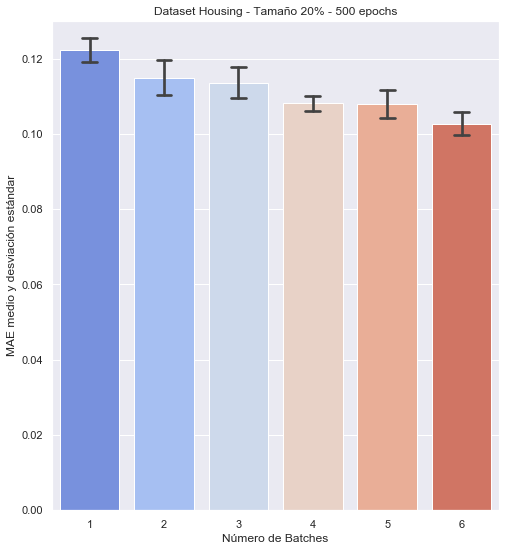

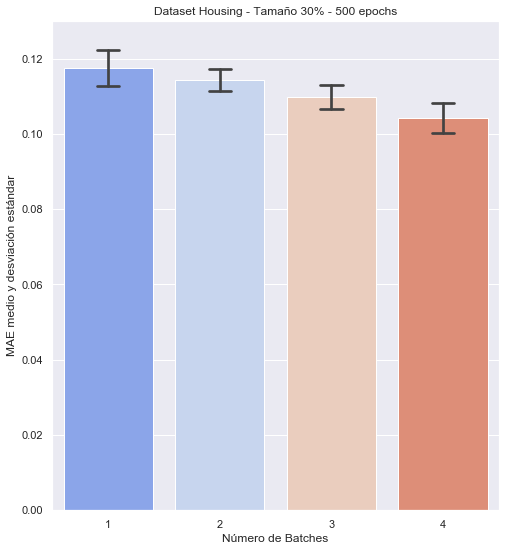

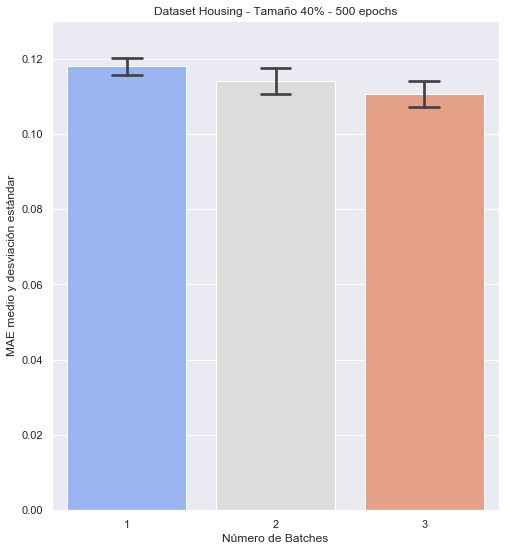

In [158]:
sns.set_theme(style="darkgrid")

pinta(res,resLabel,"numBatches","Número de Batches",vmax=0.13)


# Probamos el entrenamiento con Batches para dataset CONCRETE

In [159]:
resC30 = pd.read_pickle(ruta+'resultados_caracterizacionCon500e_30.pkl')
resC20  = pd.read_pickle(ruta+'resultados_caracterizacionCon500e_20.pkl')
resC40 = pd.read_pickle(ruta+'resultados_caracterizacionCon500e_40.pkl')

res=[resC20,resC30,resC40]
resLabel=['Dataset CONCRETE - Tamaño 20% - 500 epochs','Dataset CONCRETE - Tamaño 30% - 500 epochs','Dataset CONCRETE - Tamaño 40% - 500 epochs']

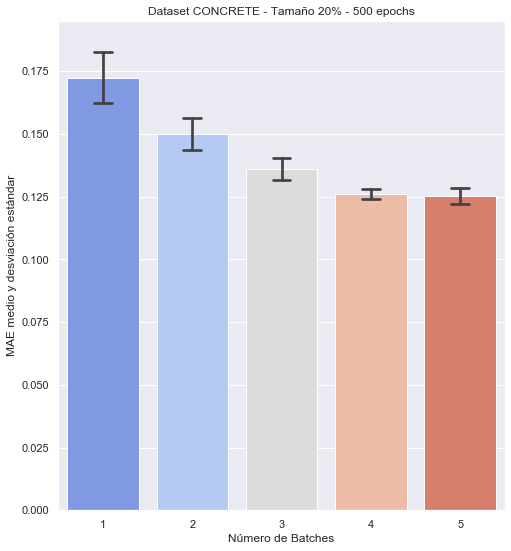

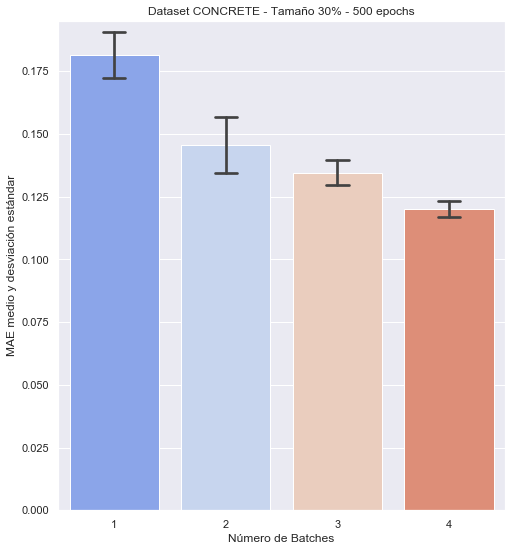

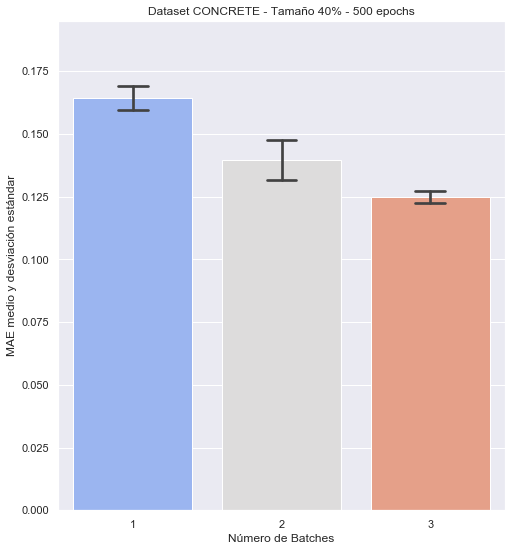

In [160]:
pinta(res,resLabel,"numBatches","Número de Batches",vmax=0.195)

# Probamos el entrenamiento con Batches para dataset POWER

In [149]:
resP30 = pd.read_pickle(ruta+'resultados_caracterizacionPow500e_30.pkl')
resP20  = pd.read_pickle(ruta+'resultados_caracterizacionPow500e_20.pkl')
resP40 = pd.read_pickle(ruta+'resultados_caracterizacionPow500e_40.pkl')
resP40b = pd.read_pickle(ruta+'resultados_caracterizacionPow1000e_40.pkl')
res=[resP20,resP30,resP40,resP40b]
resLabel=['Dataset POWER - Tamaño 20% - 500 epochs','Dataset POWER - Tamaño 30% - 500 epochs','Dataset POWER - Tamaño 40% - 500 epochs'
            ,'Dataset POWER - Tamaño 40% - 1000 epochs']

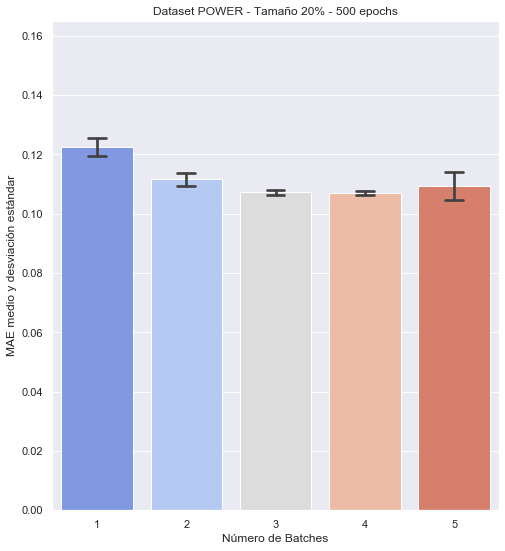

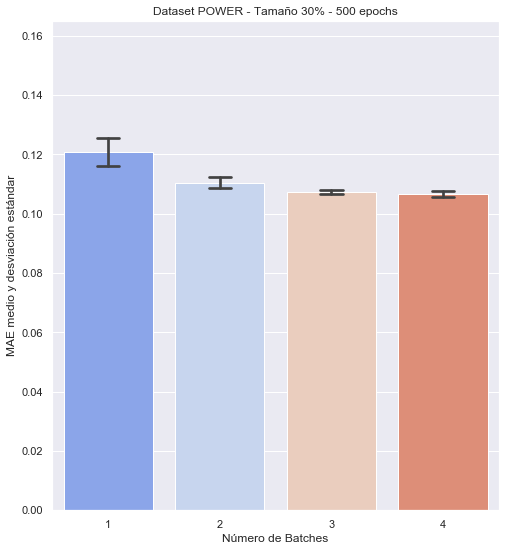

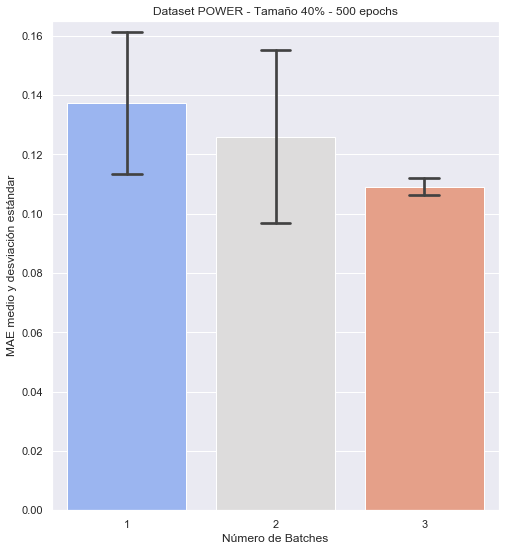

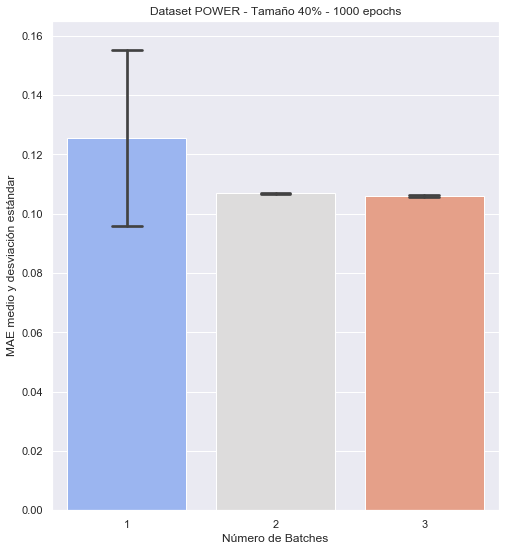

In [150]:
pinta(res,resLabel,"numBatches","Número de Batches",vmax=0.165)

# Probamos entrenamiento por Epochs para Housing
En este caso, fijamos el tamaño al 40% y entrenamos con TODOS los batches.

In [258]:
resH40 = pd.read_pickle(ruta+'resultados_caracterizacionEpochHousing40.pkl')
res=[resH40]
resLabel=['Dataset HOUSING - Tamaño 40% - Todas las muestras']

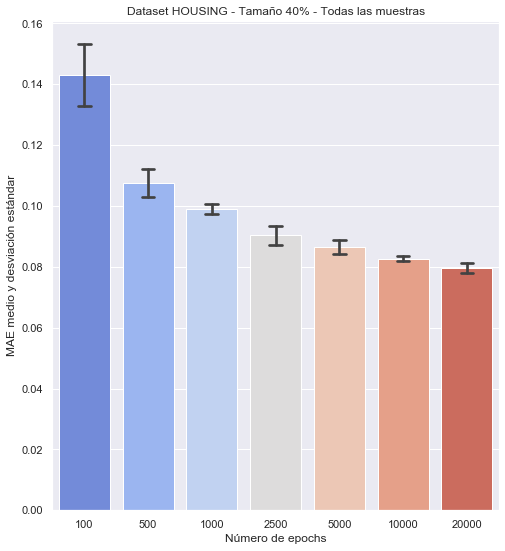

In [259]:
pinta(res,resLabel,"epochs","Número de epochs")

# HOUSING, CONCRETE, POWER: Probamos a entrenar con UN SOLO Batch y distintos epochs. Red al 40%

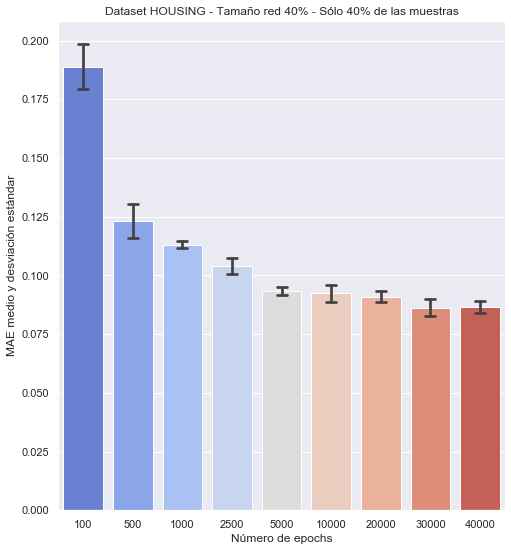

In [25]:
resHB40 = pd.read_pickle(ruta+'resultados_caracterizacionHouEpochs1Batch.pkl')
res=[resHB40]
resLabel=['Dataset HOUSING - Tamaño red 40% - Sólo 40% de las muestras']
pinta(res,resLabel,"epochs","Número de epochs")

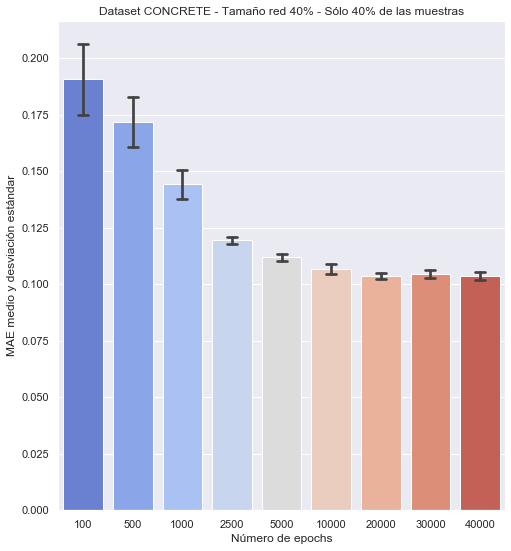

In [27]:
resCB40 = pd.read_pickle(ruta+'resultados_caracterizacionConEpoch1Batch.pkl')
res=[resCB40]
resLabel=['Dataset CONCRETE - Tamaño red 40% - Sólo 40% de las muestras']
pinta(res,resLabel,"epochs","Número de epochs")

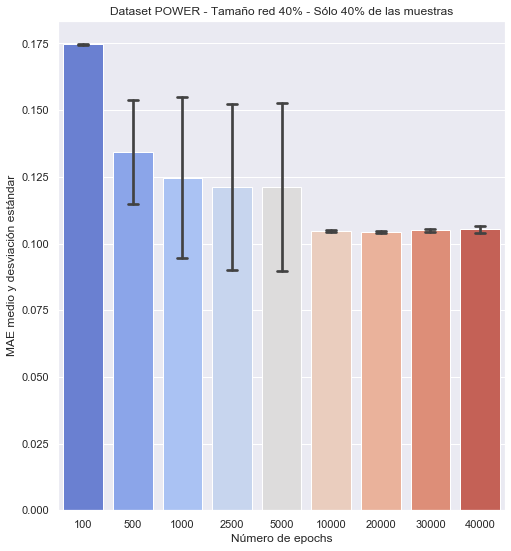

In [28]:
resPB40 = pd.read_pickle(ruta+'resultados_caracterizacionPowEpoch1Batch.pkl')
res=[resPB40]
resLabel=['Dataset POWER - Tamaño red 40% - Sólo 40% de las muestras']
pinta(res,resLabel,"epochs","Número de epochs")

# Entrenamiento con 30k epooch y un sólo Batch.
Se irá cambiando el tamaño de la red.

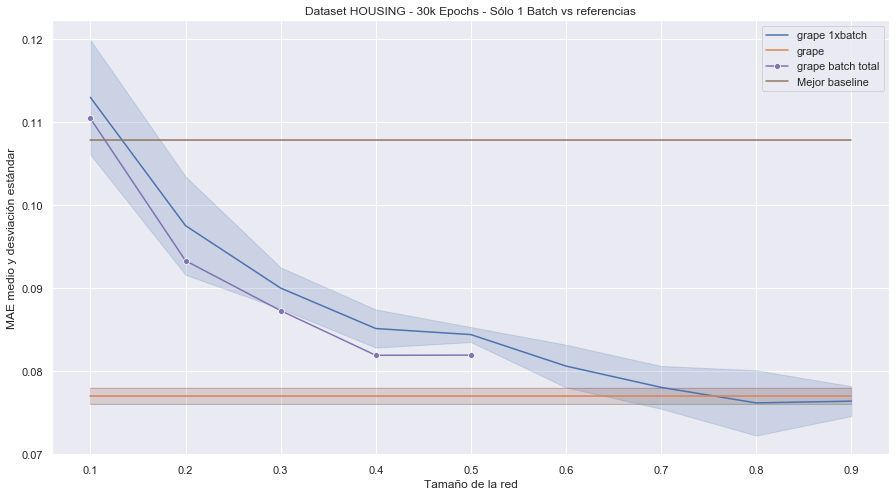

In [18]:
resHT = pd.read_pickle(ruta+'resultados_caracterizacionHouTroceado1Batch.pkl')
resHTAll = pd.read_pickle(ruta+'resultados_caracterizacionHouTroceadoAllBatch.pkl')
res=resHT
res2=resHTAll
resLabel='Dataset HOUSING - 30k Epochs - Sólo 1 Batch vs referencias'
pintaLin(res,resLabel,"tamRed","Tamaño de la red",0.0770,0.001913,0.1078,res2=res2[res2['tamRed']<0.6])

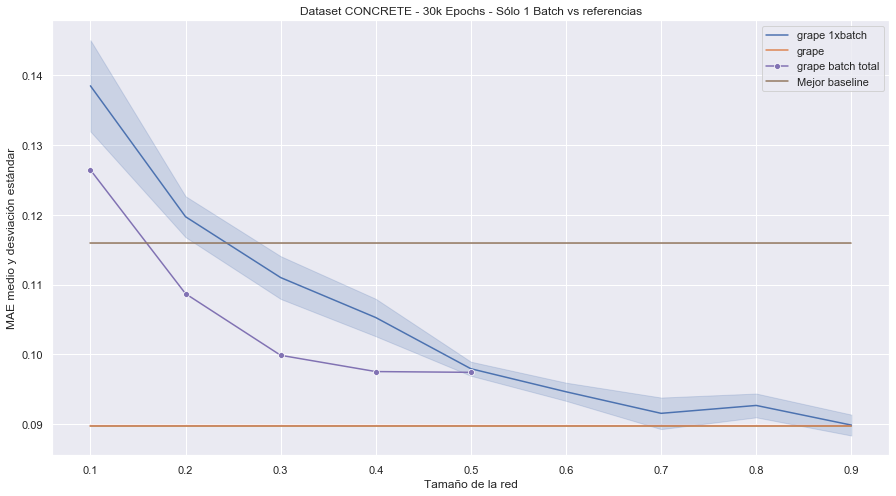

In [19]:
resCT = pd.read_pickle(ruta+'resultados_caracterizacionConTroceado1Batch.pkl')
resCTAll = pd.read_pickle(ruta+'resultados_caracterizacionConTroceadoAllBatch.pkl')
res=resCT
res2=resCTAll
resLabel='Dataset CONCRETE - 30k Epochs - Sólo 1 Batch vs referencias'
pintaLin(res,resLabel,"tamRed","Tamaño de la red",0.0898,0.000118,0.1159,res2=res2[res2['tamRed']<0.6])

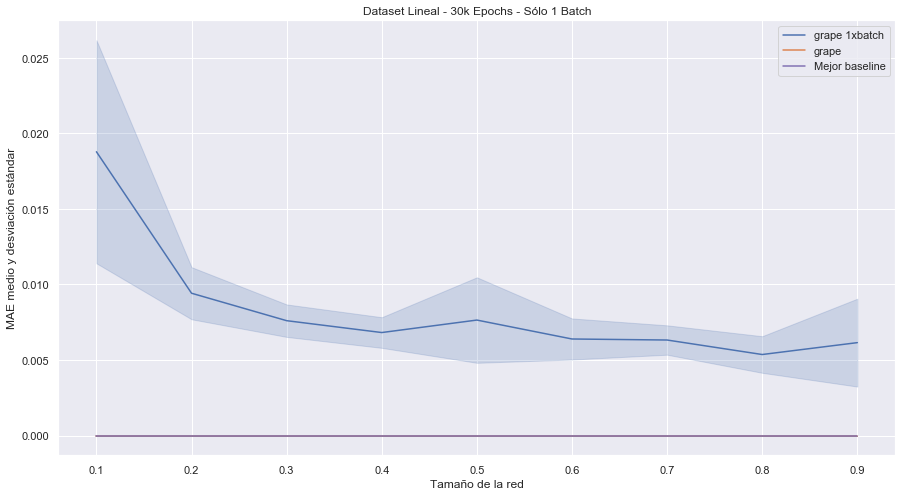

In [20]:
resLT = pd.read_pickle(ruta+'resultados_caracterizacionLinTroceado1Batch.pkl')
res=resLT
resLabel='Dataset Lineal - 30k Epochs - Sólo 1 Batch'
pintaLin(res,resLabel,"tamRed","Tamaño de la red",0,0,0)

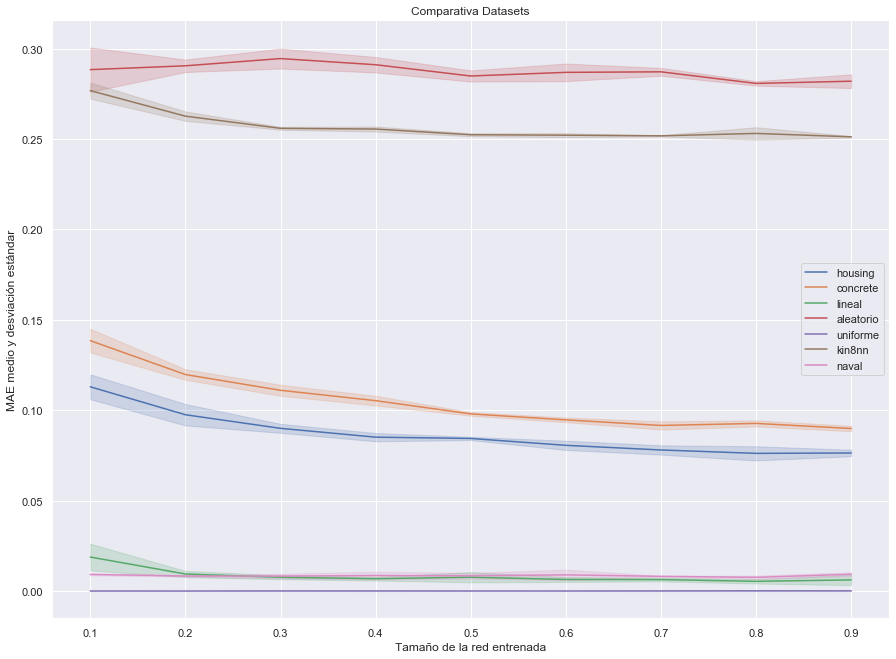

In [28]:
resAT = pd.read_pickle(ruta+'resultados_caracterizacionAleTroceado1Batch.pkl')
resUT = pd.read_pickle(ruta+'resultados_caracterizacionUniTroceado1Batch.pkl')
resKT = pd.read_pickle(ruta+'resultados_caracterizacionKinTroceado1Batch.pkl')
resNT = pd.read_pickle(ruta+'resultados_caracterizacionNaTroceado1Batch.pkl')
res=[resHT,resCT,resLT,resAT,resUT,resKT,resNT]
resLabel=["housing","concrete","lineal","aleatorio","uniforme","kin8nn","naval"]
pintaLinMulti(res,resLabel,"tamRed","Comparativa Datasets","Tamaño de la red entrenada")

In [10]:
a=pd.read_csv(ruta+'testNa.csv',sep=';')

In [11]:
a.index.name='entrenamiento'

In [12]:
d={}

In [13]:
    d.__setitem__("naval", a) 


In [14]:
resultados=pd.concat(d)

In [15]:
resultados.to_pickle(ruta+'resultados_caracterizacionNaTroceado1Batch.pkl')

In [16]:
resultados

tamRed  exp       mae      rmse       mse  accuracy
      entrenamiento                                                     
naval 0                 0.1    1  0.008944  0.027220  0.000741       0.0
      1                 0.1    2  0.009779  0.027236  0.000742       0.0
      2                 0.1    3  0.008430  0.026039  0.000678       0.0
      3                 0.1    4  0.009307  0.027833  0.000775       0.0
      4                 0.1    5  0.009498  0.028839  0.000832       0.0
      5                 0.2    1  0.008449  0.023916  0.000572       0.0
      6                 0.2    2  0.007974  0.022531  0.000508       0.0
      7                 0.2    3  0.008461  0.022943  0.000526       0.0
      8                 0.2    4  0.008623  0.023122  0.000535       0.0
      9                 0.2    5  0.008000  0.020676  0.000427       0.0
      10                0.3    1  0.007971  0.020076  0.000403       0.0
      11                0.3    2  0.009035  0.022492  0.000506       0.0
      12                0.3    3  0.008293  0.022599  0.000511       0.0
      13                0.3    4  0.006304  0.017504  0.000306       0.0
      14                0.3    5  0.009694  0.029193  0.000852       0.0
      15                0.4    1  0.012170  0.028894  0.000835       0.0
      16                0.4    2  0.006987  0.018689  0.000349       0.0
      17                0.4    3  0.007302  0.018773  0.000352       0.0
      18                0.4    4  0.008931  0.021723  0.000472       0.0
      19                0.4    5  0.007448  0.021042  0.000443       0.0
      20                0.5    1  0.006735  0.019252  0.000371       0.0
      21                0.5    2  0.007741  0.020993  0.000441       0.0
      22                0.5    3  0.009390  0.024658  0.000608       0.0
      23                0.5    4  0.007654  0.019401  0.000376       0.0
      24                0.5    5  0.010628  0.028765  0.000827       0.0
      25                0.6    1  0.006710  0.017569  0.000309       0.0
      26                0.6    2  0.006758  0.019330  0.000374       0.0
      27                0.6    3  0.007231  0.020115  0.000405       0.0
      28                0.6    4  0.010643  0.023289  0.000542       0.0
      29                0.6    5  0.013307  0.025490  0.000650       0.0
      30                0.7    1  0.008338  0.021440  0.000460       0.0
      31                0.7    2  0.007912  0.019180  0.000368       0.0
      32                0.8    1  0.007604  0.018919  0.000358       0.0
      33                0.8    2  0.008821  0.022943  0.000526       0.0
      34                0.8    3  0.007605  0.020321  0.000413       0.0
      35                0.8    4  0.006242  0.017830  0.000318       0.0
      36                0.8    5  0.007608  0.021613  0.000467       0.0
      37                0.9    1  0.010224  0.025535  0.000652       0.0
      38                0.9    2  0.009541  0.018984  0.000360       0.0
      39                0.9    3  0.008045  0.022437  0.000503       0.0

NameError: name 'np' is not defined

In [216]:
housing = [[0.106009908020496,0.114395305514335,0.115451820194721,0.10579690337181],
[0.0954278483986854,0.0960424467921257,0.0891525447368621,0.0924850404262542],
[0.0888696759939193,0.0911003202199935,0.0828930288553237,0.0861725434660911],
[0.0776057690382003,0.0805671662092208,0.0825686380267143,0.0867652148008346],
[0.0816495344042778,0.0837626010179519,0.0814321041107177,0.0807433128356933],
[0.0824809446930885,0.077293112874031,0.081196941435337,0.0783570632338523],
[0.0762365907430648,0.0755198821425437,0.0778744146227836,0.0773733556270599],
[0.0787403434514999,0.0769960880279541,0.0797208845615387,0.0759178847074508],
[0.0753266364336013,0.0770960450172424,0.0785304233431816,0.0765455290675163],
[0.0772093683481216,0.0730671733617782,0.0766942203044891,0.0791836529970169],
[0.0810094103217125,0.0770034566521644,0.0771152153611183,0.0764978229999542],
[0.0838386416435241,0.0813932418823242,0.0815400406718254,0.0825991481542587]]

In [217]:
import numpy as np

In [218]:
housingnp=np.array(housing)

In [219]:
h=housingnp.reshape(-1)
h

array([0.10600991, 0.11439531, 0.11545182, 0.1057969 , 0.09542785,
       0.09604245, 0.08915254, 0.09248504, 0.08886968, 0.09110032,
       0.08289303, 0.08617254, 0.07760577, 0.08056717, 0.08256864,
       0.08676521, 0.08164953, 0.0837626 , 0.0814321 , 0.08074331,
       0.08248094, 0.07729311, 0.08119694, 0.07835706, 0.07623659,
       0.07551988, 0.07787441, 0.07737336, 0.07874034, 0.07699609,
       0.07972088, 0.07591788, 0.07532664, 0.07709605, 0.07853042,
       0.07654553, 0.07720937, 0.07306717, 0.07669422, 0.07918365,
       0.08100941, 0.07700346, 0.07711522, 0.07649782, 0.08383864,
       0.08139324, 0.08154004, 0.08259915])

In [220]:
val=[]
l=0
for porc in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]:
    for i in range(4):  
        val.append([porc,i+1,h[l]])
        l=l+1

In [221]:
df=pd.DataFrame(val,columns=["tamRed","exp","mae"])

In [222]:
df.index.name='entrenamiento'
d={}
d.__setitem__("housing", df) 
resultados=pd.concat(d)
resultados.to_pickle(ruta+'resultados_caracterizacionHouTroceadoAllBatch.pkl')

In [223]:
resultados

tamRed  exp       mae
        entrenamiento                       
housing 0                0.10    1  0.106010
        1                0.10    2  0.114395
        2                0.10    3  0.115452
        3                0.10    4  0.105797
        4                0.20    1  0.095428
        5                0.20    2  0.096042
        6                0.20    3  0.089153
        7                0.20    4  0.092485
        8                0.30    1  0.088870
        9                0.30    2  0.091100
        10               0.30    3  0.082893
        11               0.30    4  0.086173
        12               0.40    1  0.077606
        13               0.40    2  0.080567
        14               0.40    3  0.082569
        15               0.40    4  0.086765
        16               0.50    1  0.081650
        17               0.50    2  0.083763
        18               0.50    3  0.081432
        19               0.50    4  0.080743
        20               0.60    1  0.082481
        21               0.60    2  0.077293
        22               0.60    3  0.081197
        23               0.60    4  0.078357
        24               0.70    1  0.076237
        25               0.70    2  0.075520
        26               0.70    3  0.077874
        27               0.70    4  0.077373
        28               0.80    1  0.078740
        29               0.80    2  0.076996
        30               0.80    3  0.079721
        31               0.80    4  0.075918
        32               0.90    1  0.075327
        33               0.90    2  0.077096
        34               0.90    3  0.078530
        35               0.90    4  0.076546
        36               0.95    1  0.077209
        37               0.95    2  0.073067
        38               0.95    3  0.076694
        39               0.95    4  0.079184
        40               0.99    1  0.081009
        41               0.99    2  0.077003
        42               0.99    3  0.077115
        43               0.99    4  0.076498
        44               1.00    1  0.083839
        45               1.00    2  0.081393
        46               1.00    3  0.081540
        47               1.00    4  0.082599